<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2022/blob/main/Week06_MultilinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6
# Multilinear Regression

Last time we looked at a simple linear regression model $sales = \beta_0 + \beta_1\cdot\textit{TV advertising budget}$. More generally, a linear model makes a prediction by computing a weighted sum of their input features (plus a constant).

**Reading: Chapter 4**

## Multilinear Regression: Model Assumptions
**Model**:

$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\cdots + \beta_nx_n$
1. $\hat{y}$ is the predicted value.
2. $n$ is the number of features.
3. $x_i$ is the i-th feature value.
4. $\beta_j$ is the j-th model parameter (associated with $x_j$).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Toy example
columns = ['Homework', 'Midterm', 'Final']
data = pd.DataFrame({
    "Homework": [95, 70, 80, 100, 70],
    "Midterm": [90, 60, 80, 80, 85],
    "Final": [93, 66, 85, 60, 90]
}, index=["Alice", "Bob", "Clare", "David", "Eve"])

data.head()

,Homework,Midterm,Final
Alice,95,90,93
Bob,70,60,66
Clare,80,80,85
David,100,80,60
Eve,70,85,90


In this case:
- $x_1$ is the homework feature
- $x_2$ is the midterm feature
- $y$ is the final feature
- model is: $final = \beta_0 + \beta_1 * homework + \beta_2 * midterm$
- We need to come up with values for $\beta_0, \beta_1, \beta_2$ to complete the model.

**Objective**: Suppose that another student Fred has Homework score 85 and Midterm score 80. What is prediction of his final exam score?

## Multilinear Regression: Vectorized form

The multilinear model can also be written as:

**$\hat{y} = \beta\cdot\textbf{x}$**.
1. $\beta = (\beta_0, \beta_1, ..., \beta_n)$ is the paramter vector.
2. $\textbf{x} = (1, x_1, ..., x_n)$ is the feature vector.
3. The symbol $\cdot$ represents the inner-product of two vectors. For example, $(1, 2, 3)\cdot (4, 5, 6) = 1\times 4 + 2\times 5 + 3\times 6 = 32$.

**Why is the expression $\beta\cdot\textbf{x}$ equivalent to $\beta_0 + \beta_1x_1 + \beta_2x_2 +\cdots + \beta_nx_n$?**

In [3]:
data[["Homework", "Midterm"]]

,Homework,Midterm
Alice,95,90
Bob,70,60
Clare,80,80
David,100,80
Eve,70,85


In [4]:
# Let's apply the linear regression tool in sci-kit learn on the toy example
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data[["Homework", "Midterm"]], data['Final']) # You can also use data[['Final']]


LinearRegression()

In [5]:
# What is the prediction of Fred's final score?

# Create a dataframe with Fred's records
fred = pd.DataFrame([[85, 80]], columns=["Homework", "Midterm"], index=['Fred'])
# fred
model.predict(fred)

array([78.6744186])

In [6]:
# Model's prediction is 78. This looks safe. But how much variation the prediction has?
# We can use model's error on the training data as an indicator

data['Prediction'] = model.predict(data[['Homework', 'Midterm']])
data

,Homework,Midterm,Final,Prediction
Alice,95,90,93,84.581395
Bob,70,60,66,63.279070
Clare,80,80,85,82.255814
David,100,80,60,67.930233
Eve,70,85,90,95.953488


In [7]:
# Retrieve the estimated parameter values.
print("beta1, beta2:", model.coef_)
print("beta0:", model.intercept_)

beta1, beta2: [-0.71627907  1.30697674]
beta0: 34.999999999999964


Now, let's create a linear model that describes the relationship between `sales` and all three ways of advertising.

In [8]:
url = "https://www.statlearning.com/s/Advertising.csv"
advertising = pd.read_csv(url, index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Proposed model: $sales = \beta_0 + \beta_1\cdot TV + \beta_2\cdot radio + \beta_3\cdot newspaper$.

In [9]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(advertising, test_size=0.1)
print(training_set.shape)
print(test_set.shape)

(180, 4)
(20, 4)


In [10]:
model2 = LinearRegression()
model2.fit(training_set[['TV', 'radio', 'newspaper']], training_set['sales'])

LinearRegression()

In [11]:
input_cols = ['TV', 'radio', 'newspaper']

In [12]:
# The MSE of model2 on the training set
from sklearn.metrics import mean_squared_error
y_pred = model2.predict(training_set[input_cols])
training_MSE = mean_squared_error(training_set['sales'], y_pred)
print("MSE on the training set:", training_MSE)
# This MSE is better than the MSE achieved by a simple linear regression model.

MSE on the training set: 2.841059214607274


In [13]:
# The MSE of model2 on the test set
y_pred = model2.predict(test_set[input_cols])
test_MSE = mean_squared_error(test_set['sales'], y_pred)
print("MSE on the training set:", test_MSE)

MSE on the training set: 2.307603793764574


## Multilinear Regression: Cost Function
In order to calculate the best value for each parameter, we need a **cost function** that evaluates the errors made by a give set of parameter values. Here we use the **mean squared error (MSE)** function as the cost function:

$J(\textbf{X}, \theta) = \frac{1}{m}\sum_{i=1}^{m}\big(\theta\cdot\textbf{x}^{(i)} - y^{(i)}\big)^2$

Here $(\textbf{x}^{(i)}, y^{(i)})$ represents the i-th training example

In [14]:
# Calculate the MSE cost of the toy example for the parameter values given by sci-kit learn.



## Multilinear Regression: Training Algorithm 1
The value of $\theta$ that minimizes the cost function is given by the following **normal equation**:

$\hat{\theta} = \big(\textbf{X}^T\cdot\textbf{X}\big)^{-1}\cdot\textbf{X}^T\cdot\textbf{y}$.

1. $\textbf{X}$ is an $m\times (n+1)$ matrix whose i-th row is $\textbf{x}^{(i)}$.
$$\textbf{X} = \begin{pmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_n \\
1 & x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(2)}_n \\
\vdots & \vdots &\vdots & \ddots & \vdots \\
1 & x^{(m)}_1 & x^{(m)}_2 & \cdots & x^{(m)}_n \\
\end{pmatrix}$$
2. $$\textbf{y} = \begin{pmatrix}y^{(1)} \\ \vdots \\ y^{(m)}\end{pmatrix}$$.
3. The cost function $J(\theta)$ also has a matrix expression
$$J(\theta) = \frac{1}{m}(\textbf{X}\cdot\theta - \textbf{y})^T\cdot (\textbf{X}\cdot\theta - \textbf{y})$$

In [30]:
# Construct matrix X using np.hstack(), np.ones()
N = len(training_set) # N = training_set.shape[0]
col1 = np.ones([N, 1])
# print(col1)
col234 = training_set[['TV', 'radio', 'newspaper']].values
# print(col234)
X = np.hstack([col1, col234])
print(X[0:5, :])

[[1.00000 76.40000 26.70000 22.30000]
 [1.00000 220.50000 33.20000 37.90000]
 [1.00000 199.80000 2.60000 21.20000]
 [1.00000 293.60000 27.70000 1.80000]
 [1.00000 62.30000 12.60000 18.30000]]


In [31]:
# Construct vector y
y = training_set[['sales']].values
print(y[:5])

[[11.80000]
 [20.10000]
 [10.60000]
 [20.70000]
 [9.70000]]


In [32]:
# Apply the normal equation to find theta
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})

np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([[2.89239],
       [0.04595],
       [0.19229],
       [-0.00260]])

In [33]:
# The results should be the same as the sklearn model
print(model2.coef_)
print(model2.intercept_)

[0.04595 0.19229 -0.00260]
2.892388852382126


## Multilinear Regression: Training Algorithm 2
The normal equation is not applicable when $\textbf{X}^T\cdot\textbf{X}$ is not invertible. It happens if:
- Several features are linearly dependent (for example, feature3 = feature1 + feature2)
- The number of features is greater than the number of training data (for example, DNA data)

When the matrix $\textbf{X}$ is too large, the normal equation may take too long to finish since it requires a matrix multiplication.

In these cases, we can use the **gradient descent** method to minimize the cost function instead.

Gradient descent with one variable ideally looks like this:
<img src="https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND." width="600">

Gradient descent with two variables ideally looks like this:
<img src="https://blog.paperspace.com/content/images/2019/09/F1-02.large.jpg" width="600">

Gradient descent is an iterative algorithm for finding the **local minimum** of a differentiable function.
- Choose an initial value of $\hat{\theta}$ and a **learning rate** $r$.
- For each iteration $k$, do:
$$\hat{\theta} \leftarrow \hat{\theta} - r\cdot\frac{\partial J(\hat{\theta})}{\partial \theta}.$$
- The partial derivative of the cost function is given by
$$
\frac{\partial J(\hat{\theta})}{\partial \theta} = \frac{2}{m}\cdot\textbf{X}^T\cdot(\textbf{X}\cdot\theta - \textbf{y}).
$$
- **Verify the formula of partial derivative asuuming there is one input feature.**

- End iteration if certain stop criteria is reached, such as:
    - Value of $\hat{\theta}$ becomes stable.
    - Certain iteration amount is reached.

In [52]:
# Choose a random initial value for each parameter.
np.random.seed(1234) 
theta = np.random.randn(4, 1)
print(theta)

[[0.47144]
 [-1.19098]
 [1.43271]
 [-0.31265]]


In [53]:
def MSE_cost(theta, X, y):
    m = X.shape[0]
    M = X.dot(theta) - y
    return 1/m * M.T.dot(M)

print("Initial cost:", MSE_cost(theta, X, y))

Initial cost: [[38993.12749]]


In [54]:
# Perform gradient descent once.
# Choose a learning rate r
r = 1e-5 # r = 0.00001

# 1. Calculate the gradient
m = len(training_set)
gradient = 2/m * X.T.dot(X.dot(theta) - y)
print(gradient)

# 2. Update the parameters
theta = theta - r * gradient
print(theta)


# 3. (optional) Show the MSE cost with new parameter values


MSE_cost(theta, X, y)

[[-331.93480]
 [-67217.85919]
 [-7517.28993]
 [-10831.49185]]
[[0.47475]
 [-0.51880]
 [1.50788]
 [-0.20434]]


array([[6379.51930]])

In [75]:
# Perform gradient descent multiple times
r = 0.00001
np.random.seed(1234) 
theta = np.random.randn(4, 1)
print(theta)

MSEs = [] # store the intermediate MSEs
num_iterations = 50000

for i in range(num_iterations):

    gradient = 2/m * X.T.dot(X.dot(theta) - y)
    theta = theta - r * gradient

    if i % 1000 == 0:
        print("Iteration:", i)
        print("Gradient:\n", gradient)
        print("New theta:\n", theta)
        MSE = MSE_cost(theta, X, y)
        print("New cost:", MSE)
        MSEs.append(MSE[0][0])


[[0.47144]
 [-1.19098]
 [1.43271]
 [-0.31265]]
Iteration: 0
Gradient:
 [[-331.93480]
 [-67217.85919]
 [-7517.28993]
 [-10831.49185]]
New theta:
 [[0.47475]
 [-0.51880]
 [1.50788]
 [-0.20434]]
New cost: [[6379.51930]]
Iteration: 1000
Gradient:
 [[-0.63692]
 [-0.28380]
 [8.80359]
 [-4.77894]]
New theta:
 [[0.47003]
 [0.05177]
 [0.24278]
 [-0.00087]]
New cost: [[3.82924]]
Iteration: 2000
Gradient:
 [[-0.70608]
 [-0.00397]
 [0.18929]
 [-0.09441]]
New theta:
 [[0.47693]
 [0.05247]
 [0.22055]
 [0.01113]]
New cost: [[3.69583]]
Iteration: 3000
Gradient:
 [[-0.70548]
 [0.00179]
 [0.01185]
 [0.00206]]
New theta:
 [[0.48399]
 [0.05247]
 [0.22001]
 [0.01134]]
New cost: [[3.69078]]
Iteration: 4000
Gradient:
 [[-0.70345]
 [0.00190]
 [0.00817]
 [0.00403]]
New theta:
 [[0.49104]
 [0.05245]
 [0.21992]
 [0.01130]]
New cost: [[3.68581]]
Iteration: 5000
Gradient:
 [[-0.70139]
 [0.00190]
 [0.00807]
 [0.00406]]
New theta:
 [[0.49806]
 [0.05243]
 [0.21984]
 [0.01126]]
New cost: [[3.68088]]
Iteration: 6000
Gr

In [76]:
# Calculate the MSE with different parameter values

# Optimal parameter values:
from sklearn.metrics import mean_squared_error
y_pred = model2.predict(training_set[["TV", "radio", "newspaper"]])
MSE = mean_squared_error(training_set['sales'], y_pred)
print("Optimal MSE:", MSE)

Optimal MSE: 2.841059214607274


In [77]:
MSEs

[6379.519303854328,
 3.8292377648948506,
 3.695826075779489,
 3.690778710228286,
 3.6858149476352913,
 3.680880204419793,
 3.6759742881158246,
 3.6710970303177466,
 3.666248263613418,
 3.6614278215686475,
 3.656635538721501,
 3.6518712505766007,
 3.647134793599502,
 3.642426005211053,
 3.637744723781832,
 3.633090788626598,
 3.628464039998771,
 3.6238643190849467,
 3.619291467999455,
 3.614745329778927,
 3.6102257483769224,
 3.6057325686585573,
 3.6012656363951896,
 3.596824798259124,
 3.5924099018183484,
 3.588020795531297,
 3.5836573287416558,
 3.579319351673189,
 3.575006715424589,
 3.5707192719643843,
 3.5664568741258433,
 3.562219375601919,
 3.5580066309402465,
 3.5538184955381316,
 3.5496548256375933,
 3.5455154783204392,
 3.541400311503339,
 3.5373091839329676,
 3.5332419551811447,
 3.529198485640021,
 3.525178636517278,
 3.521182269831378,
 3.517209248406811,
 3.5132594358693985,
 3.509332696641608,
 3.5054288959378996,
 3.501547899760097,
 3.4976895748927963,
 3.49385378889878

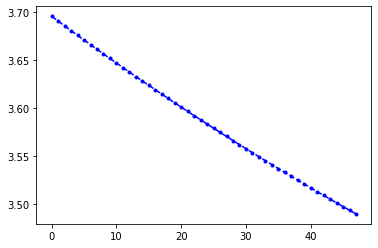

In [79]:
# Plot the learning curve.

plt.plot(range(len(MSEs)-2), MSEs[2:], 'b.--')

**Discussion**
1. Change $r$ to 0.000001 and 1. Observe the MSE curve.
2. Do the initial parameter values matter?
3. How to determine when to stop the iteration?